In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("climate_action_data.csv")

In [4]:
# inspect structure, data types and missing values
print("==== DataFrame info ====")
df.info()
print("\n==== First 5 rows of DataFrame ====")
print(df.head())
# check for missing values
print("\n==== Missing values in each column ====")
print(df.isna().sum())

print("=== Unique values in each column ===")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")

==== DataFrame info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB

==== First 5 rows of DataFrame ====
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  S

In [5]:
# Clean the data
# Replace 'error' strings with NaN
df.replace('error', np.nan, inplace=True)

# Convert numeric columns to correct types
numeric_cols = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove duplicate records
df = df.drop_duplicates()

# Check missing values again
print("\n=== Missing Values After Cleaning ===")
print(df.isna().sum())


=== Missing Values After Cleaning ===
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [6]:
# Handle missing data
# drop rows where essential sensor readings are missing
df = df.dropna(subset=['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Crop_Type'])

# fill missing with median 
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

# for date, if missing, drop
df = df.dropna(subset=['Date'])

print("\n=== Final Missing Values ===")
print(df.isna().sum())


=== Final Missing Values ===
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [7]:
#EDA
print("=== Descriptive Statistics ===")
display(df.describe())

=== Descriptive Statistics ===


,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,789,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,2026-02-05 13:12:05.475284992,44.774563,6.246946,26.469962,60.084791,87.304816,17.401521
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-20 00:00:00,26.940000,5.320000,22.300000,46.000000,57.100000,11.200000
50%,2026-02-06 00:00:00,45.370000,6.250000,26.600000,59.800000,85.300000,17.400000
75%,2026-08-25 00:00:00,62.740000,7.080000,30.600000,75.300000,117.700000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.503773,1.024433,4.872233,17.466630,34.966482,7.171804


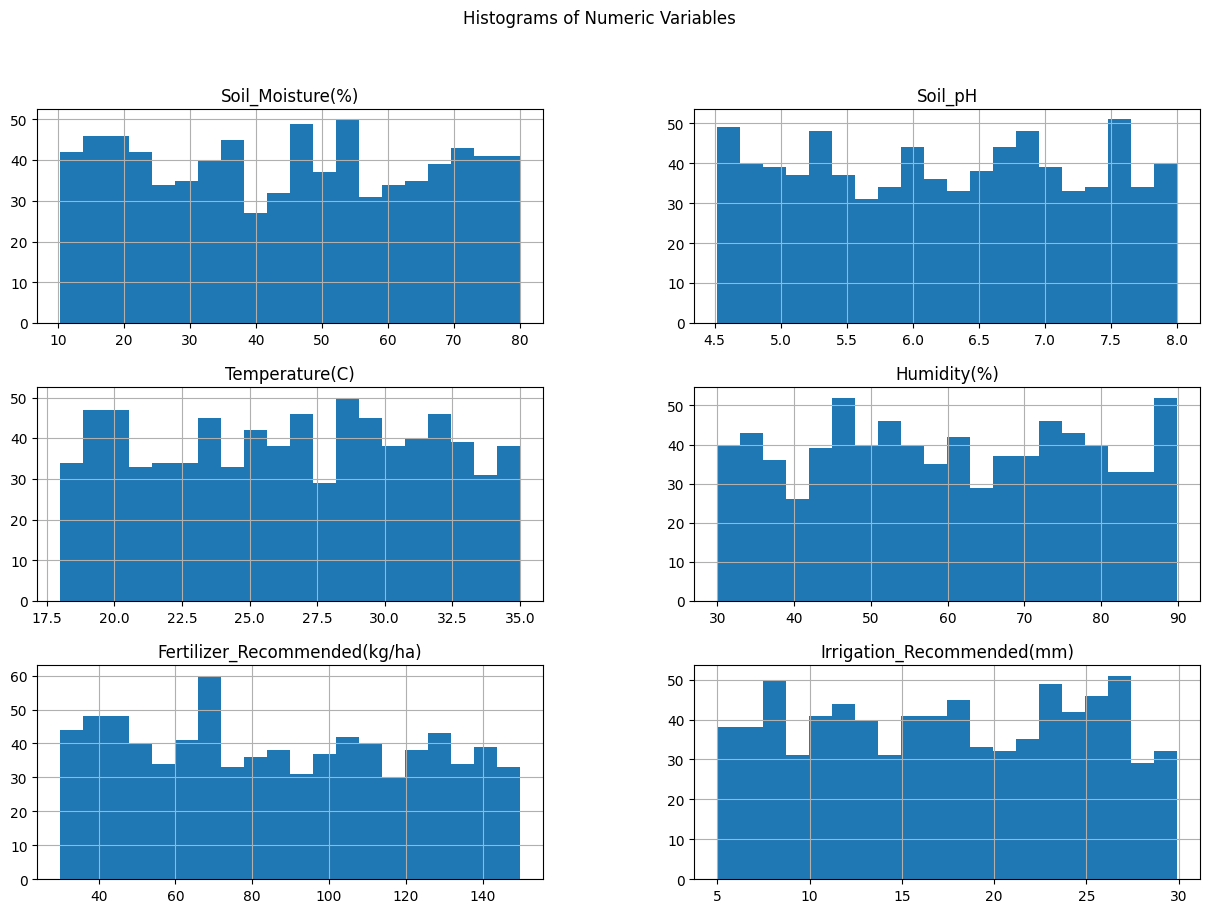

In [8]:
# histograms for numeric variables
import matplotlib.pyplot as plt 
import seaborn as sns

df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

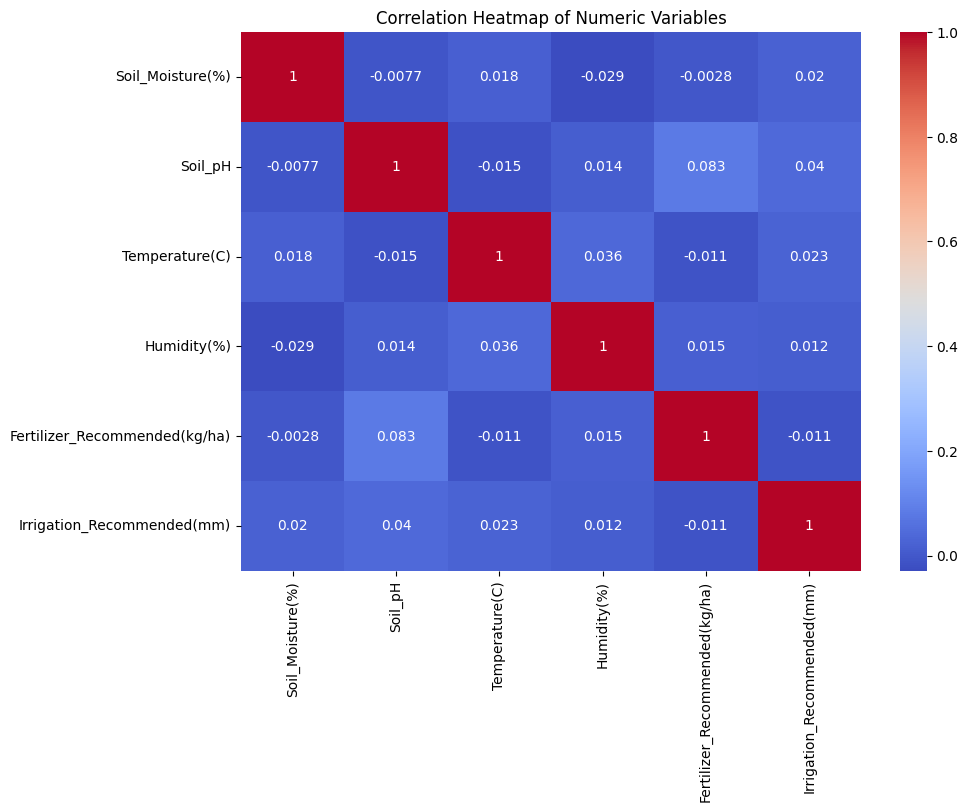

In [9]:
# correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [10]:
corr_fert = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Correlation with Fertilizer Recommendation:\n", corr_fert)

moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Average Soil Moisture by Crop Type:\n", moisture_by_crop)
print("\nCrop with highest average soil moisture:", moisture_by_crop.idxmax())


hot_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print("Average Irrigation Recommendation for Crops with Temp > 30°C:\n", hot_crops)

# cleaned data
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
print("Cleaned data exported as cleaned_precision_agriculture_data.csv")

Correlation with Fertilizer Recommendation:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
Name: Fertilizer_Recommended(kg/ha), dtype: float64
Average Soil Moisture by Crop Type:
 Crop_Type
Wheat       47.195731
Maize       44.952078
Beans       44.332133
Tomatoes    44.179333
Lettuce     42.916980
Name: Soil_Moisture(%), dtype: float64

Crop with highest average soil moisture: Wheat
Average Irrigation Recommendation for Crops with Temp > 30°C:
 Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.811429
Name: Irrigation_Recommended(mm), dtype: float64
Cleaned data exported as cleaned_precision_agriculture_data.csv
